# Continuum wavefunctions (Coulombic)

**Author: Paul Hockett, National Research Council of Canada, paul.hockett@nrc.ca, http://femtolab.ca**

To accompany the book Quantum Metrology with Photoelectrons, for more see:
* [Book webpages on femtolab.ca](http://femtolab.ca/?tag=metrology-book "Book webpages")
* [OSF project page (accompanying materials)](https://osf.io/q2v3g/ "OSF project page")
* [On Github (accompanying codes)](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons "Book code')

v1, 28th August 2017

Latest version of this notebook on Github: https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Coulombic_case/Continuum_wavefunctions.ipynb
***

The continuum wavefunction for a Coulomb scattering potential can be expressed as [1,2]:

$\Psi_{e}(\mathbf{r};\,k)=\rho^{-1}\sum_{l=0}^{\infty}(2l+1)i^{l}e^{i\sigma_{l}}F_{l}(\eta;\rho)P_{l}(\cos\theta)$

where

$\eta=Z/k$

$\rho=kr$

$\sigma_{l}=\arg\Gamma\left[l+1-i\frac{Z_{1}Z_{2}}{k}\right]$, is the Coulomb scattering phase.

$F_{l}(\eta;\rho)$ is the (regular) Coulomb function, and $\Gamma$ is the gamma function.

This notebook gives examples of these wavefunctions.

Note: the normalisation of some of these wavefunctions may be inconsistent, the numerics need to be checked more carefully.

***
[1] [Rodberg & Thaler, Intoduction to the Quantum Theory of Scattering (1967)](https://books.google.ca/books/about/Introduction_to_the_Quantum_Theory_of_Sc.html?id=rdYyAAAAMAAJ&redir_esc=y)

[2] [Messiah, A. Quantum Mechanics (1961)](https://www.amazon.com/Quantum-Mechanics-Dover-Books-Physics/dp/048678455X/ref=mt_paperback?_encoding=UTF8&me=), [PDF via the internet archive](https://archive.org/details/QuantumMechanicsVolumeI)
***

# Coulomb functions

The Coulomb function [can be defined as](https://en.wikipedia.org/wiki/Coulomb_wave_function):

$F_{\ell }(\eta ,\rho )={\frac  {2^{\ell }e^{{-\pi \eta /2}}|\Gamma (\ell +1+i\eta )|}{(2\ell +1)!}}\rho ^{{\ell +1}}e^{{\mp i\rho }}{_1}F_1(\ell +1\mp i\eta ,2\ell +2,\pm 2i\rho )$

See:
* [Wikipedia](https://en.wikipedia.org/wiki/Coulomb_wave_function)
* [Mathworld](http://mathworld.wolfram.com/CoulombWaveFunction.html)
* Abramowitz, M. and Stegun, I. A. (Eds.). "Coulomb Wave Functions." Ch. 14 in [Handbook of Mathematical Functions with Formulas, Graphs, and Mathematical Tables. New York: Dover, pp. 537-544, 1972.](https://www.amazon.com/exec/obidos/ASIN/0486612724/ref=nosim/ericstreasuretro)
* [Messiah, A. Quantum Mechanics. 1961.](https://www.amazon.com/Quantum-Mechanics-Dover-Books-Physics/dp/048678455X/ref=mt_paperback?_encoding=UTF8&me=)

Coulomb functions [are implemented](http://docs.sympy.org/0.7.6/modules/mpmath/functions/bessel.html#coulomb-wave-functions) in the mpmath module [3].

[3] Fredrik Johansson and others. mpmath: a Python library for arbitrary-precision floating-point arithmetic, December 2013. http://mpmath.org/

In [1]:
# From http://mpmath.org/
# Ref: Fredrik Johansson and others. mpmath: a Python library for arbitrary-precision floating-point arithmetic, December 2013. http://mpmath.org/
from mpmath import mp

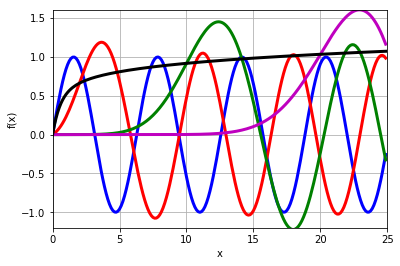

In [2]:
# Example code from http://docs.sympy.org/0.7.6/modules/mpmath/functions/bessel.html#coulomb-wave-functions
# mpmath.coulombf(l, eta, z)
# Fl(η,z)=Cl(η)zl+1e−iz1F1(l+1−iη,2l+2,2iz)
# Regular Coulomb wave functions -- equivalent to figure 14.3 in A&S
F1 = lambda x: mp.coulombf(0,0,x)
F2 = lambda x: mp.coulombf(0,1,x)
F3 = lambda x: mp.coulombf(0,5,x)
F4 = lambda x: mp.coulombf(0,10,x)
F5 = lambda x: mp.coulombf(0,x/2,x)
mp.plot([F1,F2,F3,F4,F5], [0,25], [-1.2,1.6])

# Continuum wavefunctions

Making use of the Coulomb functions, the full continuum wavefunction $\Psi_{e}(\mathbf{r};\,k)$ can then be calcualted.

In [3]:
# Define correctly normalised continuum wavefunctions, assume Z=1, and values in atomic units

# See http://mpmath.org/doc/current/functions/gamma.html?highlight=gamma#mpmath.gamma for notes on gamma function

def psiE(l,k,r):
    eta=1/k
    rho=k*r
    # Fl=mp.coulombf(l+1-eta*1j,2*l+2,2*1j*rho) # Full definition for hypergeometric term
    Fl=mp.coulombf(l,eta,rho)  # Reduced defn., should be correct for mpmath function which already incorporates 1F1
    sigma=mp.arg(mp.gamma(l+1-(1j/k)))
    psi=(2*l+1)*(1j**(l))*mp.exp(1j*sigma)*Fl
    psi=psi/rho
    
    return psi

In [4]:
# Check an example value
print(psiE(1,1.,1.))

(0.104898162210078 + 0.199655204953354j)


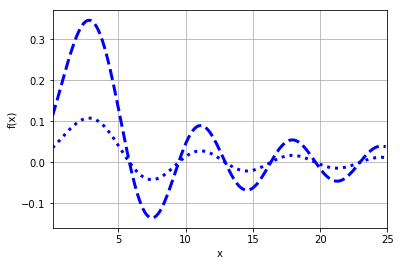

In [5]:
# Plot full wavefunction with mpmath function plotter, single |k,l> state
l=0
k=1.
mp.plot(lambda x: psiE(l,k,x),[0.1,25])

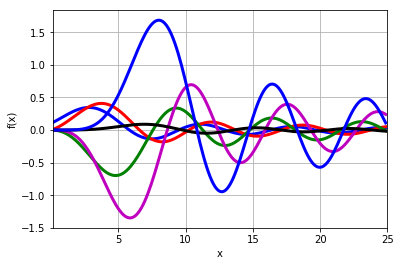

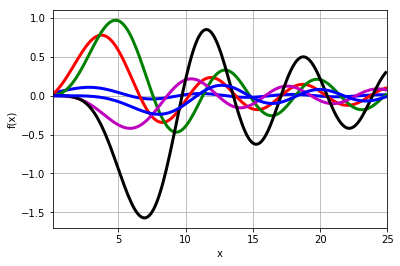

In [6]:
# Plot with mpmath function plotter, various l, plots for re and im parts.
k=1.

#  Explicit declarations as per mpmath docs, although would be neated to loop here.
# re only
psi0=lambda x: mp.re(psiE(0,k,x))
psi1=lambda x: mp.re(psiE(1,k,x))
psi2=lambda x: mp.re(psiE(2,k,x))
psi3=lambda x: mp.re(psiE(3,k,x))
psi4=lambda x: mp.re(psiE(4,k,x))
psi5=lambda x: mp.re(psiE(5,k,x))

mp.plot([psi0,psi1,psi2,psi3,psi4,psi5],[0.1,25])

# im only
psi0=lambda x: mp.im(psiE(0,k,x))
psi1=lambda x: mp.im(psiE(1,k,x))
psi2=lambda x: mp.im(psiE(2,k,x))
psi3=lambda x: mp.im(psiE(3,k,x))
psi4=lambda x: mp.im(psiE(4,k,x))
psi5=lambda x: mp.im(psiE(5,k,x))

mp.plot([psi0,psi1,psi2,psi3,psi4,psi5],[0.1,25])

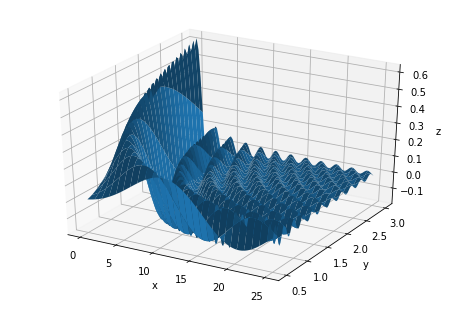

In [7]:
# Surface plot for |k,l> (may take a while)
l=0
mp.splot(lambda x,y: mp.re(psiE(l,y,x)),[0.1,25],[0.5,3.],keep_aspect=False)